# Full data experiments

In [1]:
from prutils import *
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

X, y = get_full_data(RAW_PIXELS_DATASET, split_validation=False)

"""
Results without processing
"""
qda = QDA().fit(X, y)
print "Performance without feature reduction: {}%".format(estimate_classifier_performance_normal(qda, RAW_PIXELS_TEST))

"""
Results with PCA
"""
pca = PCA(n_components=20)
qda = QDA()
qda.fit(pca.fit_transform(X), y)
print "Performance with PCA: {}%".format(estimate_classifier_performance_transform(qda, RAW_PIXELS_TEST, pca))

"""
Results with PCA
"""
ica = FastICA(n_components=18)
qda = QDA()
qda.fit(ica.fit_transform(X), y)
print "Performance with ICA: {}%".format(estimate_classifier_performance_transform(qda, RAW_PIXELS_TEST, ica))

Performance without feature reduction: 77.6%
Performance with PCA: 95.7%
Performance with ICA: 95.5%


# Batched data experiments

In [1]:
from prutils import *
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


"""
Results without processing
"""
X, y = get_random_batch(RAW_PIXELS_DATASET, split_validation=False)
qda = QDA().fit(X, y)
print "Performance without feature reduction: {}%".format(estimate_classifier_performance_normal(qda, RAW_PIXELS_TEST))

"""
Results with PCA
"""
X, y = get_random_batch(RAW_PIXELS_DATASET, split_validation=False)
pca = PCA(n_components=20)
qda = QDA()
qda.fit(pca.fit_transform(X), y)
print "Performance with PCA: {}%".format(estimate_classifier_performance_transform(qda, RAW_PIXELS_TEST, pca))

"""
Results with PCA
"""
X, y = get_random_batch(RAW_PIXELS_DATASET, split_validation=False)
ica = FastICA(n_components=18)
qda = QDA()
qda.fit(ica.fit_transform(X), y)
print "Performance with ICA: {}%".format(estimate_classifier_performance_transform(qda, RAW_PIXELS_TEST, ica))

Performance without feature reduction: 14.0%
Performance with PCA: 27.5%
Performance with ICA: 27.3%


### PCA experiments

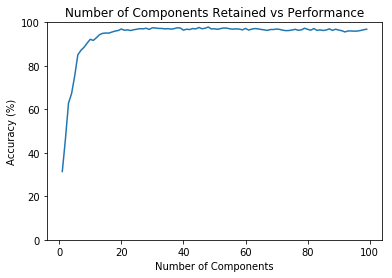

In [7]:
from prutils import *
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA 

pca_full = run_PCA_experiment(QDA(), RAW_PIXELS_DATASET, max_components = 100, batch=False, show_results=True)
pca_batch = run_PCA_experiment(QDA(), RAW_PIXELS_DATASET, max_components = 100, batch=True, show_results=True)

### ICA experiments

/home/shivam/prenv/local/lib/python2.7/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/home/shivam/prenv/local/lib/python2.7/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/home/shivam/prenv/local/lib/python2.7/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/home/shivam/prenv/local/lib/python2.7/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.wa

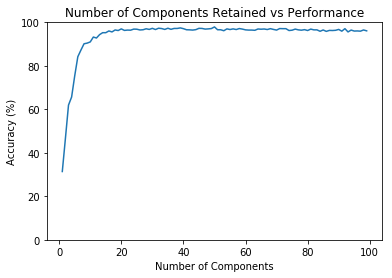

In [ ]:
from prutils import *
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

ica_full = run_ICA_experiment(QDA(), RAW_PIXELS_DATASET, max_components = 100, batch=False, show_results=True)
ica_batch = run_ICA_experiment(QDA(), RAW_PIXELS_DATASET, max_components = 100, batch=True, show_results=True)

### Kernel PCA experiments

In [ ]:
from prutils import *
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA 

kpca_full = run_KPCA_experiment(QDA(), RAW_PIXELS_DATASET, max_components = 100, batch=False, show_results=True)
kpca_batch = run_KPCA_experiment(QDA(), RAW_PIXELS_DATASET, max_components = 100, batch=True, show_results=True)